
# **Question 1 : What is Information Gain, and how is it used in Decision Trees?**


Information Gain is a measure used in decision tree algorithms to determine the effectiveness of a feature (or attribute) in classifying the data. It quantifies the reduction in entropy (or impurity) after a dataset is split on a particular attribute.

Entropy: In the context of decision trees, entropy is a measure of the impurity or randomness in a set of examples. If a dataset is perfectly homogeneous (all examples belong to the same class), its entropy is 0. If a dataset is equally divided among multiple classes, its entropy is at its maximum.

The formula for entropy for a binary classification problem is: Entropy(S) = -p(+) log2(p(+)) - p(-) log2(p(-)) Where S is the dataset, p(+) is the proportion of positive examples, and p(-) is the proportion of negative examples.

How is it used in Decision Trees?
Decision Tree algorithms, such as ID3, C4.5, and CART, use Information Gain to decide which attribute to split on at each node. The goal is to build a tree that can accurately predict the target variable by making a series of decisions based on the input features.

Here's the process:

Calculate Entropy of the Parent Node: First, the entropy of the current dataset (parent node) is calculated. This represents the initial impurity before any split.

Calculate Entropy for Each Possible Split: For each available feature, the algorithm considers splitting the dataset based on that feature's values. For each potential split, it calculates the entropy of the resulting child nodes.

Calculate Information Gain: Information Gain is then calculated for each feature as: Information Gain(S, A) = Entropy(S) - Σ ( ( |Sv| / |S| ) * Entropy(Sv) ) Where:

S is the parent dataset.  
A is the feature being considered for the split.  
Sv is the subset of S for which feature A has value v.    
|Sv| / |S| is the proportion of examples in Sv relative to S.
The summation Σ is over all possible values v of feature A.
Essentially, Information Gain measures how much the entropy   (impurity) decreases when you split the dataset S on feature A.

Select the Best Split: The algorithm chooses the feature that yields the highest Information Gain as the splitting criterion for the current node. This feature is considered the most informative because it best separates the data into more homogeneous subsets.

Repeat: This process is recursively applied to each child node until a stopping criterion is met (e.g., all nodes are pure, a maximum depth is reached, or the number of samples in a node is too small).

In summary, Information Gain guides the decision tree construction process by prioritizing splits that lead to the most significant reduction in data impurity, ultimately resulting in a more efficient and accurate classification or regression model.

# **Question 2: What is the difference between Gini Impurity and Entropy? Hint: Directly compares the two main impurity measures, highlighting strengths, weaknesses, and appropriate use cases.**

Gini Impurity   
Definition: Gini Impurity measures how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. It quantifies the probability of misclassifying a new instance if a random class label is assigned to it based on the distribution of classes in the node.    

Formula: For a node t and c classes, the Gini impurity is calculated as: Gini(t) = 1 - Σ (p_i)^2 Where p_i is the proportion of observations belonging to class i at node t.  

Range: Its value ranges from 0 to 0.5 (for a binary classification problem, it's 0 when all samples belong to one class and 0.5 when samples are equally distributed between two classes).  

Characteristics:    

Computationally faster: It involves squaring probabilities rather than using logarithms, making it slightly faster to compute.
Favors larger partitions: It tends to isolate the most frequent class in its own branch.    
Often used in CART: The Classification and Regression Trees (CART) algorithm typically uses Gini impurity.    

Entropy
Definition: Entropy, originating from information theory, measures the average amount of information (or uncertainty) in a variable. In the context of decision trees, it quantifies the randomness or disorder of a set of examples.   

Formula: For a node t and c classes, the Entropy is calculated as: Entropy(t) = -Σ (p_i * log2(p_i)) Where p_i is the proportion of observations belonging to class i at node t.      

Range: Its value ranges from 0 to 1 (for a binary classification problem, it's 0 when all samples belong to one class and 1 when samples are equally distributed between two classes).    

Characteristics:    

Computationally slower: Involves logarithmic calculations, which are generally slower than squaring.

Tends to create more balanced trees: It aims to reduce uncertainty and can lead to more balanced splits.
   
Often used in ID3 and C4.5: These algorithms commonly use Entropy and Information Gain.   

# Question 3: What is Pre-Pruning in Decision Trees) **

Pre-pruning, also known as early stopping or forward pruning, is a technique used in the construction of decision trees to prevent overfitting. Instead of growing a full decision tree and then pruning it back (post-pruning), pre-pruning involves stopping the tree growth early during its construction phase. The idea is to halt the splitting process of a node if adding further splits does not significantly improve the model's performance or if the node contains too few samples.

The primary goal of pre-pruning is to create simpler, more generalized trees that perform better on unseen data by avoiding the capture of noise and outliers in the training dataset.

How Pre-Pruning Works (Stopping Criteria):
Pre-pruning typically uses specific stopping criteria that are evaluated at each node before a split is performed. If any of these criteria are met, the node is turned into a leaf node, and no further splitting occurs from that point.

Common pre-pruning criteria include:

Maximum Depth of the Tree: The tree growth is stopped when it reaches a predefined maximum depth. For example, if the maximum depth is set to 5, the tree will not have more than 5 levels of decisions.

Minimum Number of Samples Required to Split an Internal Node (min_samples_split): A node will not be split if the number of training samples at that node is less than a specified threshold. This prevents creating splits that are based on very few observations, which might be noise.

Minimum Number of Samples Required in a Leaf Node (min_samples_leaf): If a split would result in any leaf node having fewer samples than a specified minimum, that split is not performed. This ensures that each leaf node represents a significant number of observations.

Minimum Decrease in Impurity (min_impurity_decrease or min_gain): A node will only be split if the split results in an impurity reduction (e.g., Gini impurity or entropy reduction) greater than or equal to a certain threshold. If the potential gain from a split is too small, it's considered not worth making.

Maximum Number of Leaf Nodes (max_leaf_nodes): The tree growth is stopped when the total number of leaf nodes reaches a predefined maximum. This indirectly controls the complexity of the tree.

Alpha Pruning (Cost Complexity Pruning during construction): While often associated with post-pruning, some algorithms might integrate a form of cost-complexity analysis during the building phase to decide whether a split is beneficial by considering a trade-off between error and complexity.

Advantages of Pre-Pruning:

Computational Efficiency: Since the tree stops growing early, it can be significantly faster to train compared to growing a full tree and then post-pruning it. This is particularly beneficial for large datasets.

Simpler Models: It often results in smaller, less complex trees, which are easier to interpret and understand.
Reduced Overfitting: By stopping the tree growth before it perfectly fits the training data, pre-pruning helps to generalize better to unseen data, reducing the risk of overfitting.
Direct Control: The stopping criteria provide direct control over the complexity of the tree.

Disadvantages of Pre-Pruning:
Greedy Approach: Pre-pruning makes decisions about stopping splits locally at each node. It might stop a split that appears unpromising at the current step but could lead to highly beneficial splits further down the tree. This is known as the "horizon effect." It means pre-pruning can sometimes lead to suboptimal trees.

Difficulty in Setting Thresholds: Choosing appropriate values for the stopping criteria (e.g., max_depth, min_samples_split) can be challenging and often requires trial and error or cross-validation.
Potential for Underfitting: If the pruning criteria are too strict, the tree might be too simplistic and fail to capture important patterns in the data, leading to underfitting.
Example (Conceptual):

Imagine we are building a decision tree to classify whether a customer will purchase a product (Yes/No) based on their Age, Income, and Previous Purchases. Let's assume we set the following pre-pruning criteria:

Maximum Depth = 2
Minimum samples to split = 10
Minimum impurity decrease = 0.1
Scenario 1: Initial Split

The root node has 100 samples.
We evaluate splitting by Income (e.g., Income < $50K and Income >= $$50K and Income >= $50K).
This split creates two child nodes: one with 60 samples (Income < $50K) and one with 40 samples (Income >= $$50K) and one with 40 samples (Income >= $50K).
The impurity decrease is calculated, let's say it's 0.2 (which is > 0.1). Since both child nodes have > 10 samples, and the impurity decrease is sufficient, this split is performed.
Scenario 2: Next Level Split

Now we consider the child node with 60 samples (Income < $50K). Its current depth is 1 (0-indexed).
We evaluate splitting this node by Age (e.g., Age < 30 and Age >= 30).
This split creates two new nodes: one with 8 samples (Age < 30) and one with 52 samples (Age >= 30).
Pre-pruning in action: The first new node has only 8 samples. Since our min_samples_leaf criterion is typically implicitly handled by min_samples_split if we set it, or explicitly by min_samples_leaf, if we consider min_samples_split = 10, this split would not be allowed as one of the resulting branches (8 samples) is less than 10. Alternatively, if our min_samples_leaf was 10, this split would be disallowed because one leaf would have fewer than 10 samples. So, the Income < $50K node would become a leaf node, even if the impurity decrease was good.
Also, if this split by Age had an impurity decrease of only 0.05 (which is < 0.1), it would also be disallowed, and the node would become a leaf.
Furthermore, if we had already reached Depth = 2 for this node, no further splits would be allowed due to the max_depth criterion.
By applying these rules at each step, the tree growth is controlled, leading to a smaller, potentially more robust tree.

In Python's scikit-learn library, you can implement pre-pruning using parameters of DecisionTreeClassifier or DecisionTreeRegressor like max_depth, min_samples_split, min_samples_leaf, and min_impurity_decrease.

In [1]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier with pre-pruning parameters
# These values are illustrative; you would typically tune them using techniques
# like cross-validation.
model = DecisionTreeClassifier(
    max_depth=5,                 # Limit the maximum depth of the tree to 5 levels
    min_samples_split=20,        # Require at least 20 samples in a node to consider splitting it
    min_samples_leaf=10,         # Ensure each leaf node has at least 10 samples
    min_impurity_decrease=0.01,  # Only split if the impurity decreases by at least 0.01
    random_state=42              # For reproducibility
)

print("Decision Tree Classifier initialized with pre-pruning parameters:")
print(model)

# To use this model, you would then fit it to your training data:
# model.fit(X_train, y_train)


Decision Tree Classifier initialized with pre-pruning parameters:
DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)



# **Question 4:Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances (practical).**

 Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_


1.  **Import necessary libraries**: `DecisionTreeClassifier` from `sklearn.tree`, `numpy` for data generation, and `pandas` for potentially handling feature names.
2.  **Prepare sample data**: Create a dummy dataset with features and a target variable. In a real-world scenario, you would load your dataset here.
3.  **Initialize the Classifier**: Create an instance of `DecisionTreeClassifier` and set the `criterion` parameter to `'gini'`.
4.  **Train the model**: Use the `.fit()` method to train the model on your features (`X`) and target (`y`).
5.  **Access feature importances**: After training, the `.feature_importances_` attribute of the trained model will contain the importance scores for each feature.

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1. Create a dummy dataset for demonstration
# In a real scenario, you would load your data here (e.g., pd.read_csv('your_data.csv'))
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
y = pd.Series(np.random.randint(0, 2, 100)) # Binary target variable

print("Sample Features (X.head()):")
display(X.head())
print("\nSample Target (y.head()):")
display(y.head())

# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the Decision Tree Classifier with Gini Impurity
# criterion='gini' specifies Gini Impurity as the splitting criterion
model = DecisionTreeClassifier(criterion='gini', random_state=42)

print("\nDecision Tree Classifier initialized with criterion='gini':")
print(model)

# 3. Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")

# 4. Print feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (using Gini Impurity):")
display(importance_df)


Sample Features (X.head()):


,feature_0,feature_1,feature_2,feature_3,feature_4
0,0.374540,0.950714,0.731994,0.598658,0.156019
1,0.155995,0.058084,0.866176,0.601115,0.708073
2,0.020584,0.969910,0.832443,0.212339,0.181825
3,0.183405,0.304242,0.524756,0.431945,0.291229
4,0.611853,0.139494,0.292145,0.366362,0.456070



Sample Target (y.head()):


,0
0,1
1,0
2,0
3,0
4,0



Decision Tree Classifier initialized with criterion='gini':
DecisionTreeClassifier(random_state=42)

Model training complete.

Feature Importances (using Gini Impurity):


,Feature,Importance
1,feature_1,0.316994
4,feature_4,0.293649
2,feature_2,0.220810
3,feature_3,0.128143
0,feature_0,0.040404


# **Question 5: What is a Support Vector Machine (SVM)?**

  A Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm primarily used for classification, but also applicable to regression tasks. The fundamental idea behind SVM is to find an optimal hyperplane that best separates data points of different classes in a high-dimensional space, maximizing the margin between these classes.

1. How it Works:  

Hyperplane: In a 2-dimensional space, a hyperplane is a line. In a 3-dimensional space, it's a plane. In higher dimensions, it's an (N-1)-dimensional subspace. The SVM algorithm's goal is to find the best such hyperplane that serves as a decision boundary to separate the different classes.

Margin: The margin is the distance between the separating hyperplane and the closest data points from each class. These closest data points are called support vectors. The SVM algorithm seeks to maximize this margin because a larger margin generally leads to better generalization performance (i.e., better performance on unseen data).

Support Vectors: These are the data points from the training set that lie closest to the hyperplane and therefore define the margin. They are the most crucial instances for determining the position and orientation of the hyperplane. If any of these support vectors are removed, the optimal hyperplane would change. Data points further away from the margin do not influence the hyperplane.

2. Key Concepts:  
Linear SVM: When data points can be perfectly separated by a straight line (or a hyperplane in higher dimensions), the SVM is referred to as a Linear SVM. It finds the linear decision boundary that maximizes the margin.

Non-linear SVM (Kernel Trick): Often, real-world data is not linearly separable in its original feature space. To handle this, SVM employs a technique called the kernel trick. The kernel trick implicitly maps the input data into a higher-dimensional feature space where it may become linearly separable, without explicitly calculating the coordinates in that higher space. This allows SVM to find complex, non-linear decision boundaries in the original lower-dimensional space.

Common kernel functions include:  

Polynomial Kernel: Useful for creating polynomial decision boundaries.
Radial Basis Function (RBF) Kernel (or Gaussian Kernel): A very popular choice that can handle non-linear relationships by mapping data into an infinite-dimensional space.
Sigmoid Kernel: Similar to a two-layer neural network.
Soft Margin SVM: In practice, datasets often contain noise or overlapping classes, making perfect linear separation impossible or undesirable. A soft margin allows some data points to be misclassified or to fall within the margin. This is controlled by a regularization parameter C:    

A small C value prioritizes a wider margin, allowing more misclassifications (higher bias, lower variance).
A large C value penalizes misclassifications more heavily, aiming for a smaller margin with fewer errors (lower bias, higher variance, more prone to overfitting).

3. Advantages of SVMs:

Effective in High-Dimensional Spaces: SVMs perform particularly well when the number of features is very large, even larger than the number of samples.
Memory Efficient: Since the decision function relies only on a subset of the training data (the support vectors), SVMs are memory efficient.
Versatile: With the use of various kernel functions, SVMs can model a wide range of complex decision boundaries.
Good Generalization: By maximizing the margin, SVMs inherently aim for better generalization, leading to good performance on unseen data.

4. Disadvantages of SVMs:

Computational Intensity: Training SVMs can be computationally expensive and time-consuming, especially for very large datasets, or when using complex kernel functions.
Parameter Tuning: The performance of SVMs is highly dependent on the careful selection of the kernel function and regularization parameters (C, gamma for RBF kernel), which often requires extensive tuning (e.g., using cross-validation).
Lack of Probabilistic Output: SVMs directly output decision scores (distance from the hyperplane) rather than class probabilities. While probabilities can be estimated, it often involves additional computationally expensive methods.
Interpretability: SVM models, especially with non-linear kernels, can be challenging to interpret. It's difficult to understand the direct relationship between input features and the output decision.

First, let's set up a simple linearly separable dataset and train a **Linear SVM** to find the optimal hyperplane and margin.

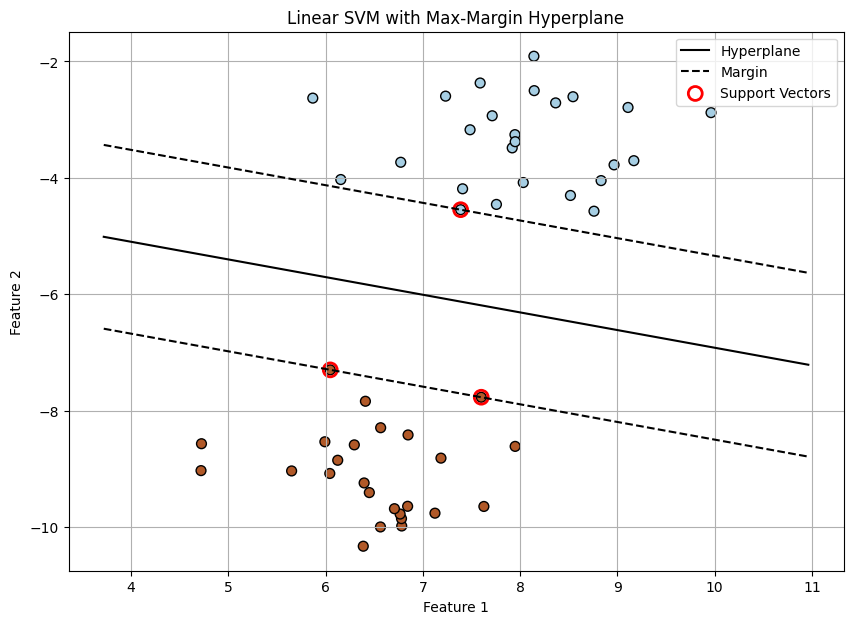

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a simple linearly separable dataset
X, y = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=0.8)

# Fit the SVM model (linear kernel by default)
# C is the regularization parameter. A smaller C allows a wider margin but potentially more misclassifications.
model_linear = svm.SVC(kernel='linear', C=1.0, random_state=42)
model_linear.fit(X, y)

# Get the hyperplane (w.x + b = 0) parameters
w = model_linear.coef_[0]
b = model_linear.intercept_[0]
x_plot = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
y_hyperplane = (-w[0] * x_plot - b) / w[1]

# Get the margins
y_lower = (-w[0] * x_plot - b - 1) / w[1] # For margin = -1
y_upper = (-w[0] * x_plot - b + 1) / w[1] # For margin = +1

# Plot the data, hyperplane, and margins
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(x_plot, y_hyperplane, 'k-', label='Hyperplane')
plt.plot(x_plot, y_lower, 'k--', label='Margin')
plt.plot(x_plot, y_upper, 'k--')

# Plot support vectors
plt.scatter(model_linear.support_vectors_[:, 0], model_linear.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='r', linewidths=2, label='Support Vectors')

plt.title('Linear SVM with Max-Margin Hyperplane')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


This plot visualizes a simple two-class dataset with a linear SVM. You can observe the hyperplane that separates the classes, the margin around it, and the support vectors (highlighted in red) that critically define this boundary.

Next, let's demonstrate a **Non-linear SVM** using the `rbf` (Radial Basis Function) kernel for a dataset that is not linearly separable in its original feature space.

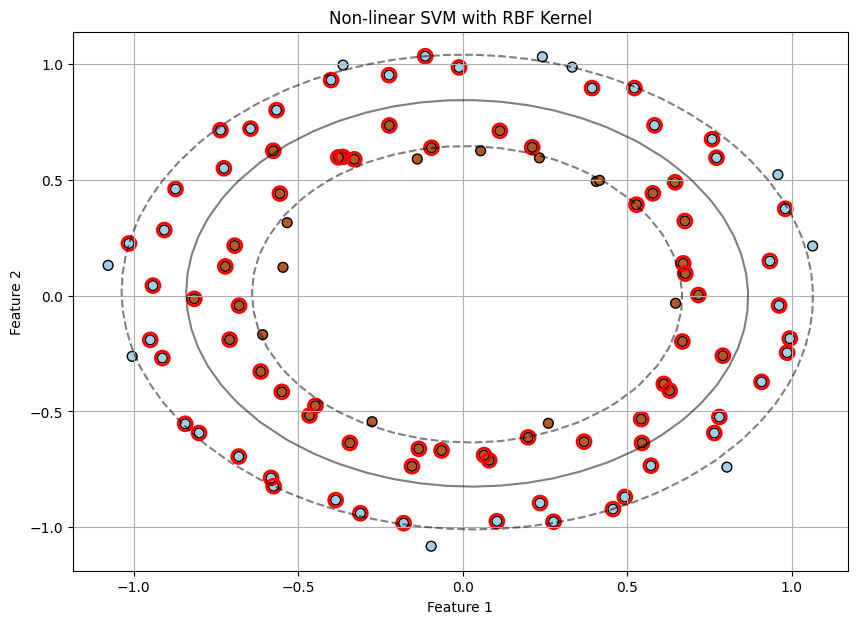

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Create a non-linearly separable dataset (concentric circles)
X_nonlinear, y_nonlinear = make_circles(n_samples=100, factor=.7, noise=.05, random_state=42)

# Fit the SVM model with a non-linear kernel (RBF)
# C and gamma are key parameters for RBF kernel.
# gamma defines how far the influence of a single training example reaches.
# Low values mean 'far' and high values mean 'close'.
model_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
model_rbf.fit(X_nonlinear, y_nonlinear)

# Plotting the decision boundary for non-linear SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='r', linewidths=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.figure(figsize=(10, 7))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, s=50, cmap=plt.cm.Paired, edgecolors='k')
plot_svc_decision_function(model_rbf)
plt.title('Non-linear SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In this example, the RBF kernel allows the SVM to find a circular decision boundary that effectively separates the two classes, even though they are not linearly separable in their original 2D space. The support vectors are again highlighted in red, indicating the critical points that define the non-linear boundary.

# **Question 6: What is the Kernel Trick in SVM?**

The Kernel Trick is a fundamental concept in Support Vector Machines (SVMs) that allows them to efficiently handle non-linearly separable data. In essence, it enables SVMs to find a linear decision boundary in a higher-dimensional feature space without explicitly computing the coordinates of the data points in that higher-dimensional space.  


The Problem with Non-linear Data:
Many real-world datasets are not linearly separable. This means you cannot draw a single straight line (or a flat hyperplane in higher dimensions) to perfectly separate the different classes. For example, data points arranged in concentric circles or intertwined spirals cannot be separated by a linear boundary.

The Idea Behind the Kernel Trick:   
The core idea is to transform the original input data into a higher-dimensional space where it does become linearly separable. If we can map the data from a lower-dimensional space (e.g., 2D) to a higher-dimensional space (e.g., 3D or even infinite-dimensional), a linear separator might become possible in that new space. Once a linear boundary is found in the higher-dimensional space, it corresponds to a non-linear boundary when mapped back to the original, lower-dimensional space.

The "Trick" - Implicit Mapping:   
Explicitly computing and working with data in a very high (or infinite) dimensional space can be computationally expensive or even impossible. This is where the "trick" comes in:

Instead of explicitly performing the mapping φ(x) (where φ is the transformation function) and then computing the dot product φ(x_i) ⋅ φ(x_j) in the higher-dimensional space, the kernel trick uses a kernel function, K(x_i, x_j), that directly calculates the dot product as if the data had been mapped to the higher-dimensional space.

K(x_i, x_j) = φ(x_i) ⋅ φ(x_j)       

This means we only need to compute the kernel function, which is often much simpler and computationally cheaper than the explicit transformation and dot product in the high-dimensional space.

Benefits:   
Handles Non-linear Data: Allows SVMs to model complex non-linear relationships.
Computational Efficiency: Avoids the expensive explicit computation of features in a high-dimensional space.
Dimensionality Independence: The computational complexity often depends on the number of training examples, not necessarily the dimensionality of the mapped space.
Common Kernel Functions (Examples):
Linear Kernel:

K(x_i, x_j) = x_i ⋅ x_j
This is used when the data is linearly separable, and it's equivalent to an SVM without the kernel trick (i.e., a traditional linear SVM).  

Polynomial Kernel:

K(x_i, x_j) = (γ * (x_i ⋅ x_j) + r)^d
d is the degree of the polynomial, γ (gamma) is a scaling factor, and r (coef0) is an independent term.
This maps data into a feature space that allows for polynomial decision boundaries.
Radial Basis Function (RBF) Kernel / Gaussian Kernel:

K(x_i, x_j) = exp(-γ * ||x_i - x_j||²)
γ (gamma) is a parameter that defines how far the influence of a single training example reaches. A small γ means a large influence (smooth boundary), while a large γ means a small influence (jagged boundary).
This is a very popular and powerful kernel, as it implicitly maps the data into an infinite-dimensional feature space, enabling highly complex, non-linear decision boundaries.
Sigmoid Kernel:

K(x_i, x_j) = tanh(γ * (x_i ⋅ x_j) + r)
Similar to the activation function in a two-layer neural network.
Example (referencing the previous non-linear SVM plot):
In the previous non-linear SVM example (cell 53cf5fe0), we used kernel='rbf' to classify data arranged in concentric circles. This dataset was not linearly separable in its original 2D space.

When we applied the RBF kernel, the SVM effectively found a circular decision boundary that separated the inner and outer circles. This non-linear boundary in the original 2D space is precisely the result of the kernel trick: the RBF kernel implicitly projected the 2D data into a much higher-dimensional space where a linear hyperplane could separate them. The plot you saw was the projection of this linear hyperplane back into the 2D plane, appearing as a non-linear (circular) boundary.

Without the kernel trick, we would have struggled to find such a boundary using a simple linear SVM on the original 2D data.

# **Question 7: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.**

Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting
on the same dataset.

To train and compare SVM classifiers with different kernels:

1.  **Import necessary libraries**: `SVC` from `sklearn.svm`, `load_wine` from `sklearn.datasets`, `train_test_split` from `sklearn.model_selection`, and `accuracy_score` from `sklearn.metrics`.    
2.  **Load the dataset**: The Wine dataset is a classic multi-class classification dataset available directly from scikit-learn.      
3.  **Prepare the data**: Separate features (`X`) from the target variable (`y`) and then split them into training and testing sets.    
4.  **Initialize Classifiers**: Create two `SVC` instances: one with `kernel='linear'` and another with `kernel='rbf'`.     
5.  **Train Models**: Fit both models on the *same* training data.    
6.  **Make Predictions**: Use each trained model to make predictions on the test set.     
7.  **Calculate and Compare Accuracies**: Compute the accuracy score for each model's predictions against the true test labels and print the results.     

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target # Target variable

print("Dataset loaded successfully.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 3. Initialize and train SVM classifiers with different kernels

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', random_state=42)
print("\nTraining Linear SVM...")
svm_linear.fit(X_train, y_train)
print("Linear SVM training complete.")

# RBF Kernel SVM
# 'gamma' is a parameter for non-linear kernels. 'scale' uses 1 / (n_features * X.var()) as gamma.
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
print("Training RBF SVM...")
svm_rbf.fit(X_train, y_train)
print("RBF SVM training complete.")

# 4. Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# 5. Compare their accuracies
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"\nAccuracy with Linear Kernel SVM: {accuracy_linear:.4f}")
print(f"Accuracy with RBF Kernel SVM:   {accuracy_rbf:.4f}")

if accuracy_linear > accuracy_rbf:
    print("\nThe Linear Kernel SVM performed better on this dataset.")
elif accuracy_rbf > accuracy_linear:
    print("\nThe RBF Kernel SVM performed better on this dataset.")
else:
    print("\nBoth Linear and RBF Kernel SVMs performed equally well on this dataset.")


Dataset loaded successfully.
Number of samples: 178
Number of features: 13
Number of classes: 3

Training set size: 124 samples
Testing set size: 54 samples

Training Linear SVM...
Linear SVM training complete.
Training RBF SVM...
RBF SVM training complete.

Accuracy with Linear Kernel SVM: 0.9444
Accuracy with RBF Kernel SVM:   0.6667

The Linear Kernel SVM performed better on this dataset.


# **Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

The Naïve Bayes classifier is a collection of classification algorithms based on Bayes' Theorem. It's a probabilistic machine learning model primarily used for classification tasks, especially in areas like text classification (e.g., spam filtering, sentiment analysis) and medical diagnosis. It's known for its simplicity, speed, and surprisingly good performance in many real-world scenarios.

How it Works (Based on Bayes' Theorem):
Bayes' Theorem is stated as:

P(A|B) = [P(B|A) * P(A)] / P(B)

Where:

P(A|B) is the posterior probability of class A given predictor B (i.e., the probability that a data point belongs to class A given certain observed features B). This is what we want to calculate.
P(B|A) is the likelihood, the probability of predictor B given class A (i.e., the probability of observing features B given that the data point belongs to class A).
P(A) is the prior probability of class A (i.e., the probability of class A occurring irrespective of the features).
P(B) is the prior probability of predictor B (i.e., the probability of observing features B irrespective of the class).
In the context of classification, if we have a target variable y (the class) and a set of features x1, x2, ..., xn (the predictors), Bayes' Theorem becomes:

P(y | x1, x2, ..., xn) = [P(x1, x2, ..., xn | y) * P(y)] / P(x1, x2, ..., xn)

The classifier then predicts the class y that has the highest posterior probability.

Why is it called "Naïve"?
The term "Naïve" comes from the fundamental assumption that the features (x1, x2, ..., xn) are conditionally independent of each other, given the class y. In other words, the presence or absence of one feature does not affect the presence or absence of any other feature, as long as we know the class of the data point.

Mathematically, this "naïve" assumption simplifies P(x1, x2, ..., xn | y) to the product of individual probabilities:

P(x1, x2, ..., xn | y) = P(x1 | y) * P(x2 | y) * ... * P(xn | y)

So, the Naïve Bayes formula for classification becomes:

P(y | x1, x2, ..., xn) = P(y) * P(x1 | y) * P(x2 | y) * ... * P(xn | y) / P(x1, x2, ..., xn)

Since P(x1, x2, ..., xn) is constant for all classes for a given input, we only need to maximize the numerator to find the most probable class:

y_predicted = argmax_y [P(y) * P(x1 | y) * P(x2 | y) * ... * P(xn | y)]

This independence assumption is almost always false in real-world data, which is why the classifier is called "Naïve." For instance, in an email, the word "Viagra" and the word "pharmacy" are not independent; they are likely to appear together in a spam email. Despite this unrealistic assumption, Naïve Bayes often performs surprisingly well in practice, especially for tasks with many features and where true feature dependencies are complex or hard to model directly.

Types of Naïve Bayes Classifiers:
Different types of Naïve Bayes exist, primarily differing in the assumptions made about the distribution of P(xi | y):

Gaussian Naïve Bayes: Used when features have continuous values and are assumed to follow a Gaussian (normal) distribution. The mean and standard deviation for each feature per class are calculated from the training data.
Multinomial Naïve Bayes: Suitable for discrete counts, particularly common in text classification. It models the likelihood P(xi | y) as a multinomial distribution, often used for word counts or frequencies.
Bernoulli Naïve Bayes: Assumes binary features (i.e., a feature either exists or not). It's also used in text classification for binary word occurrence (present/absent) rather than counts.
Advantages:
Simple and Fast: Easy to implement and computationally efficient.
Scalable: Works well with large datasets.
Good for high-dimensional data: Effective even when the number of features is very large.
Performs well with small training datasets: Can sometimes outperform more complex models with limited data.
Handles both continuous and discrete data: Depending on the variant (Gaussian, Multinomial, etc.).
Disadvantages:
Strong Independence Assumption: The "naïve" assumption of feature independence is rarely true in reality, which can sometimes lead to reduced accuracy.
Zero-Frequency Problem: If a category for a feature is not observed in the training data for a particular class, the probability P(xi | y) will be zero, causing the entire posterior probability for that class to be zero. This can be mitigated using smoothing techniques like Laplace smoothing.
Poor Estimator: While it's a good classifier, its probability estimates can be less reliable due to the independence assumption.
Example (Spam Filtering):
Consider a simple spam filter. We want to classify an email as Spam or Not Spam based on the presence of words like "money" and "free."

Training Data (simplified):

Email ID	Word: "money"	Word: "free"	Class (y)
1	Yes	Yes	Spam
2	Yes	No	Spam
3	No	Yes	Spam
4	No	No	Not Spam
5	No	No	Not Spam
Calculate Prior Probabilities:

P(Spam) = 3/5 = 0.6
P(Not Spam) = 2/5 = 0.4
Calculate Likelihoods (P(feature | class)):

P("money"=Yes | Spam) = 2/3 (2 spam emails had "money" out of 3 total spam)

P("money"=No | Spam) = 1/3

P("free"=Yes | Spam) = 2/3

P("free"=No | Spam) = 1/3

P("money"=Yes | Not Spam) = 0/2 = 0 (0 not-spam emails had "money" out of 2 total not-spam)

P("money"=No | Not Spam) = 2/2 = 1

P("free"=Yes | Not Spam) = 0/2 = 0

P("free"=No | Not Spam) = 2/2 = 1

Test Case: New email has "money"=Yes and "free"=No.

We want to find P(Spam | "money"=Yes, "free"=No) and P(Not Spam | "money"=Yes, "free"=No).

Using the Naïve Bayes formula (ignoring the denominator, which is constant):

For Spam Class: P(Spam | features) ∝ P(Spam) * P("money"=Yes | Spam) * P("free"=No | Spam) ∝ 0.6 * (2/3) * (1/3) = 0.6 * 0.667 * 0.333 ≈ 0.133

For Not Spam Class: P(Not Spam | features) ∝ P(Not Spam) * P("money"=Yes | Not Spam) * P("free"=No | Not Spam) ∝ 0.4 * 0 * 1 = 0

Since 0.133 > 0, the new email would be classified as Spam.

This example highlights the simplicity and the independence assumption at play. Notice how P("money"=Yes | Not Spam) being 0 immediately made the probability for Not Spam zero, which is the zero-frequency problem. In practice, Laplace smoothing (adding a small number to all counts) would be used to avoid this.

In summary, Naïve Bayes is a powerful yet simple probabilistic classifier that makes a strong, often unrealistic, assumption about feature independence. Despite this, its efficiency and effectiveness make it a popular choice for many classification tasks.

# **Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

These variants primarily differ in the assumptions they make about the distribution of P(feature | class) (the likelihood of observing a feature given a particular class). The choice of variant depends on the nature of your features (e.g., continuous, count-based, binary).

1. Gaussian Naïve Bayes
Assumption: Assumes that continuous features associated with each class are distributed according to a Gaussian (normal) distribution.  

Feature Type: Best suited for continuous numerical features (e.g., height, weight, temperature, pixel intensities in an image).
How it Works: For each feature and each class, the algorithm calculates the mean and standard deviation from the training data. When making a prediction for a new data point, it uses these parameters to calculate the probability density of the feature's value belonging to that class using the Gaussian probability density function.  

Example Use Cases: Classifying iris species based on sepal/petal dimensions, predicting house prices based on continuous attributes, medical diagnosis from continuous test results.

2. Multinomial Naïve Bayes    

Assumption: Assumes that features represent counts or frequencies of events. It models the likelihood P(feature | class) as a multinomial distribution.     
Feature Type: Best suited for discrete features representing counts (e.g., word counts in a document, number of times a specific event occurs).       
How it Works: For each feature and each class, it calculates the proportion of times that feature value appears relative to all features in that class. It's often used with term frequency (TF) or TF-IDF representations in text data.      
Example Use Cases: Text classification (e.g., spam detection, sentiment analysis, categorizing news articles by topic) where features are word counts, document classification.     

3. Bernoulli Naïve Bayes    
Assumption: Assumes that features are binary-valued (i.e., they represent the presence or absence of a particular event). It models the likelihood P(feature | class) as a Bernoulli distribution.        
Feature Type: Best suited for binary or Boolean features (e.g., a word is present or absent in a document, a user clicked an ad or not).        
How it Works: For each feature and each class, it estimates the probability of a feature being present (having a value of 1) and the probability of it being absent (having a value of 0). It explicitly penalizes the absence of a feature that is indicative of a specific class.   
Example Use Cases: Text classification where features are binary indicators of word presence/absence (rather than counts), document classification based on presence of keywords, spam detection based on a checklist of certain words.   

Summary Table of Differences:

Aspect	Gaussian Naïve Bayes	Multinomial Naïve Bayes	Bernoulli Naïve Bayes

Feature Type	Continuous numerical (e.g., float, int)	Discrete counts/frequencies (e.g., word counts)	Binary/Boolean (0 or 1, present/absent)

Feature Distribution	Gaussian (Normal) Distribution	Multinomial Distribution	Bernoulli Distribution

Likelihood Calc.	Mean and standard deviation per feature per class	Proportional frequency of feature values per class	Probability of feature presence/absence per class

Common Use Cases	Medical diagnosis, image classification (pixels)	Text classification (word counts), document categorization	Text classification (word presence), spam filtering

Data Preprocessing	Often scaling or no special treatment required	Bag-of-words (counts), TF-IDF (normalized counts)	Binary bag-of-words (0/1 indicators)


Choosing the right variant depends entirely on the nature of your data's features. If you have continuous data, Gaussian is often a good start. For text with word counts, Multinomial is typical. For binary presence/absence data, Bernoulli is appropriate.

# Question 10: Breast Cancer Dataset

**Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy. **    

Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from sklearn.datasets.     


To train a Gaussian Naïve Bayes classifier and evaluate its accuracy:

1.  **Import necessary libraries**: `GaussianNB` from `sklearn.naive_bayes`, `load_breast_cancer` from `sklearn.datasets`, `train_test_split` from `sklearn.model_selection`, and `accuracy_score` from `sklearn.metrics`.
2.  **Load the dataset**: The Breast Cancer dataset is a common classification dataset available directly from scikit-learn.
3.  **Prepare the data**: Separate features (`X`) from the target variable (`y`) and then split them into training and testing sets.
4.  **Initialize the Classifier**: Create an instance of `GaussianNB`.
5.  **Train the model**: Use the `.fit()` method to train the model on your training data.
6.  **Make Predictions**: Use the trained model to make predictions on the test set.
7.  **Calculate Accuracy**: Compute the accuracy score by comparing the predicted labels with the true test labels.

In [7]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
bc = load_breast_cancer()
X = bc.data  # Features
y = bc.target # Target variable

print("Breast Cancer Dataset loaded successfully.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {bc.feature_names[:5]}...")
print(f"Target names: {bc.target_names}")

# 2. Split the dataset into training and testing sets
# We use stratify=y to ensure that the proportion of target classes is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 3. Initialize the Gaussian Naïve Bayes classifier
model_gnb = GaussianNB()

print("\nGaussian Naïve Bayes Classifier initialized:")
print(model_gnb)

# 4. Train the model
print("\nTraining Gaussian Naïve Bayes model...")
model_gnb.fit(X_train, y_train)
print("Model training complete.")

# 5. Make predictions on the test set
y_pred = model_gnb.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy of Gaussian Naïve Bayes classifier on the test set: {accuracy:.4f}")


Breast Cancer Dataset loaded successfully.
Number of samples: 569
Number of features: 30
Number of classes: 2
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target names: ['malignant' 'benign']

Training set size: 398 samples
Testing set size: 171 samples

Gaussian Naïve Bayes Classifier initialized:
GaussianNB()

Training Gaussian Naïve Bayes model...
Model training complete.

Accuracy of Gaussian Naïve Bayes classifier on the test set: 0.9474
